In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import set_config
set_config(display = 'diagram')

# Sklearn preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# EDA

In [3]:
# for brands: target encoder from scikit learn

In [4]:
df = pd.read_csv('~/code/aplabey/2nd_hand_fashion_valuation/raw_data/vestiaire.csv')
df.head(30)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0
5,43246347,Mid-length dress,Mid,"See By Chloe white dress, size 42 IT (size lik...",See by Chloé Cotton - elasthane Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,3062607,julie3062607,1-2 days,France,3.0,22.0,493200.0,21.0,100.0
6,43246327,Silk trousers,Silk trousers Just Cavalli Black size 40 IT in...,Amazing flamingo three quarters trousers 100 s...,Just Cavalli Silk Trousers,Women,Women Clothing,All seasons,Never worn,1.0,...,Tourcoing,26079249,trulavina26079249,NaN,Belgium,0.0,8.0,0.0,5.0,0.0
7,43246317,Silk mid-length dress,Silk mid,Plaid sleeveless below knee silk dress. Worn ...,J.Crew Silk Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,19210149,catriona19210149,6-7 days,Ireland,40.0,41.0,0.0,43.0,82.0
8,43246287,Suit jacket,Suit jacket Aquascutum Beige size 46 IT in Cot...,Aquascutum classic cut short sleeve jacket and...,Aquascutum Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,14857400,navi2018,1-2 days,Italy,26.0,49.0,283504.0,34.0,96.0
9,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Tweed suit with lace edges. In perfect conditi...,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,2709130,simo2709130,1-2 days,Italy,172.0,6.0,4692.0,375.0,95.0


In [5]:
df.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [6]:
df.isnull().sum()


product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [8]:
df.dtypes


product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count            float64
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees          object
buyers_fees                   float64
warehouse_na

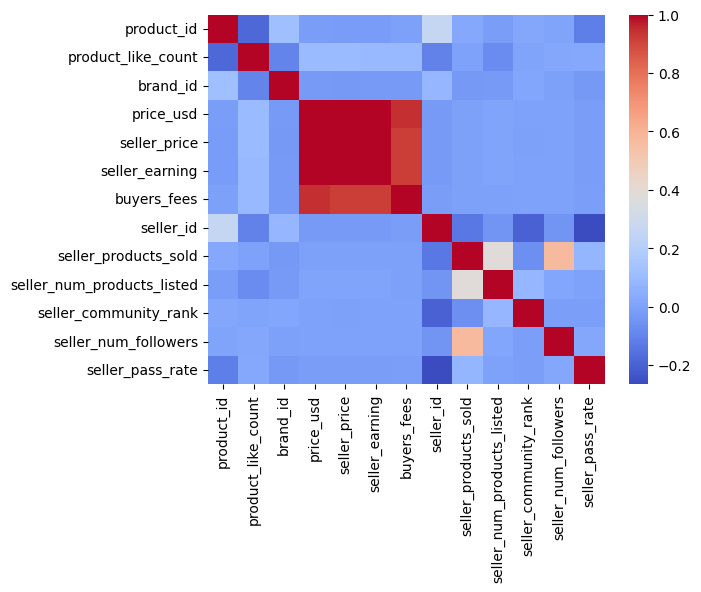

In [9]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()


<AxesSubplot:>

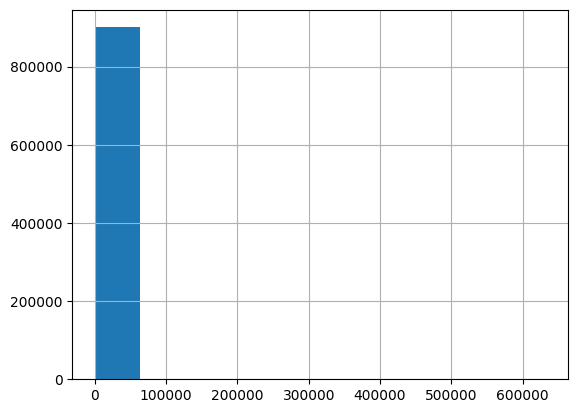

In [10]:
df['price_usd'].hist()

<AxesSubplot:>

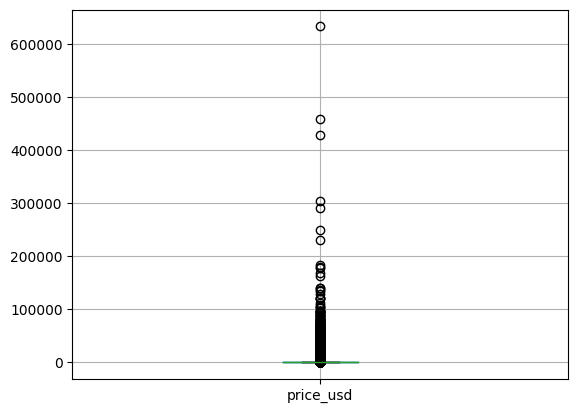

In [11]:
df.boxplot(column='price_usd')


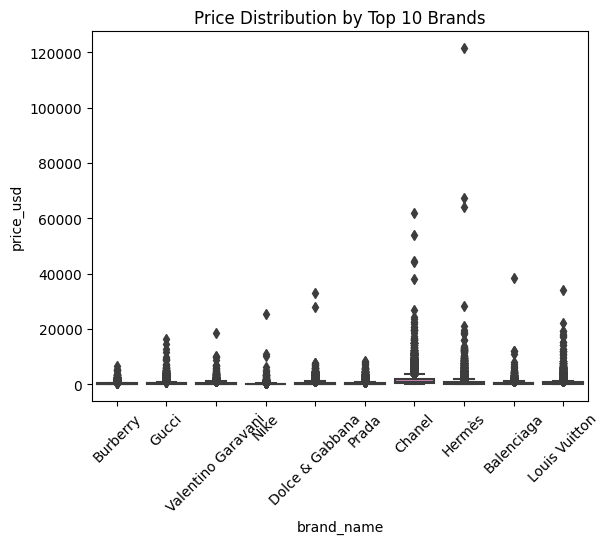

In [12]:
# Boxplot for Brands (only top brands to avoid clutter)
top_brands = df['brand_name'].value_counts().index[:10]  # Select top 10 brands by frequency
sns.boxplot(x='brand_name', y='price_usd', data=df[df['brand_name'].isin(top_brands)])
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 10 Brands')
plt.show()


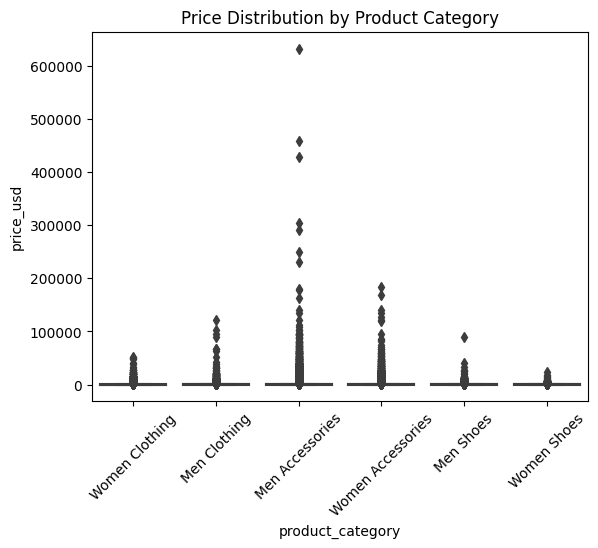

In [13]:
sns.boxplot(x='product_category', y='price_usd', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Product Category')
plt.show()

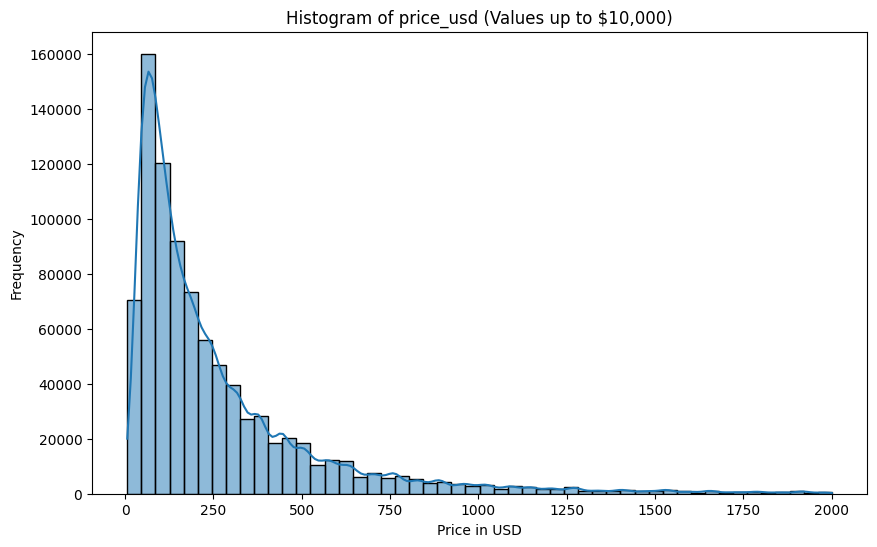

In [14]:
df_filtered = df[df['price_usd'] <= 2000]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price_usd'], bins=50, kde=True)
plt.title('Histogram of price_usd (Values up to $10,000)')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

In [15]:
df_capped = df[df['price_usd'] <= 10000]

# Display the first few rows of the new dataframe to confirm
df_capped.shape

(898367, 36)

In [16]:
df.shape

(900514, 36)

In [17]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

product_description           7
product_keywords           1183
product_category           1183
product_season                2
product_material              4
product_color                 1
has_cross_border_fees     13736
buyers_fees               13736
seller_username              39
usually_ships_within     154791
dtype: int64


In [18]:
import numpy as np

df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days") # Replace NaN by most common value
df['usually_ships_within'].value_counts()

1-2 days            701734
3-5 days            180755
6-7 days             16816
More than 7 days      1209
Name: usually_ships_within, dtype: int64

In [19]:
df['has_cross_border_fees'].value_counts()

True    886778
Name: has_cross_border_fees, dtype: int64

In [20]:
df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False) # Replace NaN by most common value
df['has_cross_border_fees'].value_counts()


True     886778
False     13736
Name: has_cross_border_fees, dtype: int64

In [21]:
df['buyers_fees'] = df['buyers_fees'].replace(np.nan, 0) # Replace NaN by most common value
df['buyers_fees']


0           0.00
1          21.30
2         213.00
3          14.90
4          19.95
           ...  
900509     14.91
900510     25.56
900511     31.95
900512      9.59
900513    159.75
Name: buyers_fees, Length: 900514, dtype: float64

In [22]:
df[['has_cross_border_fees', 'buyers_fees']]

,has_cross_border_fees,buyers_fees
0,False,0.00
1,True,21.30
2,True,213.00
3,True,14.90
4,True,19.95
...,...,...
900509,True,14.91
900510,True,25.56
900511,True,31.95
900512,True,9.59


In [23]:
#remove remaining null values, drop rows
df = df.dropna()


In [24]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [25]:
brand_avg_price = df.groupby('brand_name')['price_usd'].mean()

# Sort the brands by average price in descending order
top_brands = brand_avg_price.sort_values(ascending=False).head(20)
top_brands

brand_name
Richard Mille             83408.116667
A. Lange & Sohne          50014.530000
Patek Philippe            34832.169735
Graff                     34727.760000
Audemars Piguet           22151.781268
Jason of Beverly Hills    20350.000000
Roger Dubuis              19845.143636
Nello Santi               17957.850000
Harry Winston             17534.209630
Ossie Clark               16500.000000
De Grisogono              15943.284286
Glashütte Original        15202.357143
Daniel Roth               15195.420000
Breguet                   14391.155091
Rolex                     13919.776675
Mellerio                  12422.160000
Blancpain                 11991.234773
Adfunture Workshop        11502.000000
Vacheron Constantin       11313.007692
Van Cleef & Arpels        11041.216716
Name: price_usd, dtype: float64

In [26]:
df['brand_name'].value_counts().head(40)

Gucci                  41008
Burberry               24018
Dolce & Gabbana        22024
Prada                  20972
Hermès                 18711
Louis Vuitton          18673
Chanel                 15006
Nike                   13621
Valentino Garavani     10641
Balenciaga             10571
Dior                   10492
Fendi                  10460
Adidas                 10030
Saint Laurent           9887
Versace                 9786
Polo Ralph Lauren       9097
Christian Louboutin     7852
Bottega Veneta          6871
Yves Saint Laurent      6757
Dsquared2               6383
Givenchy                6336
Salvatore Ferragamo     5940
Tod's                   5826
Max Mara                5808
Celine                  5787
Alexander McQueen       5534
Jimmy Choo              5051
Dior Homme              4898
Moncler                 4881
Miu Miu                 4413
Moschino                4289
Michael Kors            4285
D&G                     4262
Sandro                  4261
Boss          

In [27]:
material_mapping = {
    'Wool': 'Natural Fibers',
    'Cotton': 'Natural Fibers',
    'Silk': 'Natural Fibers',
    'Linen': 'Natural Fibers',
    'Cashmere': 'Natural Fibers',
    'Polyester': 'Synthetic Fibers',
    'Polyamide': 'Synthetic Fibers',
    'Synthetic': 'Synthetic Fibers',
    'Lycra': 'Synthetic Fibers',
    'Spandex': 'Synthetic Fibers',
    'Leather': 'Animal-Based Materials',
    'Suede': 'Animal-Based Materials',
    'Fur': 'Animal-Based Materials',
    'Rabbit': 'Animal-Based Materials',
    'Mink': 'Animal-Based Materials',
    'Fox': 'Animal-Based Materials',
    'Python': 'Animal-Based Materials',
    'Shearling': 'Animal-Based Materials',
    'Alligator': 'Animal-Based Materials',
    'Crocodile': 'Animal-Based Materials',
    'Chinchilla': 'Animal-Based Materials',
    'Pony-style calfskin': 'Animal-Based Materials',
    'Water snake': 'Animal-Based Materials',
    'Eel': 'Animal-Based Materials',
    'Gold': 'Metals',
    'Platinum': 'Metals',
    'Titanium': 'Metals',
    'Silver': 'Metals',
    'Steel': 'Metals',
    'Gold plated': 'Metals',
    'White gold': 'Metals',
    'Yellow gold': 'Metals',
    'Silver Plated': 'Metals',
    'Silver Gilt': 'Metals',
    'Cotton - elasthane': 'Blends',
    'Denim - Jeans': 'Blends',
    'Wicker': 'Blends',
    'Vegan leather': 'Other Materials',
    'Velvet': 'Other Materials',
    'Lace': 'Other Materials',
    'Glitter': 'Other Materials',
    'Tweed': 'Other Materials',
    'Vinyl': 'Other Materials',
    'Exotic leathers': 'Other Materials',
    'Plastic': 'Other Materials',
    'Patent leather': 'Other Materials',
    'Astrakhan': 'Other Materials',
    'Ostrich': 'Other Materials',
    'Sponge': 'Other Materials',
    'Rubber': 'Other Materials',
    'Wood': 'Other Materials',
    'Ceramic': 'Other Materials',
    'Glass': 'Other Materials',
    'Pearl': 'Other Materials',
    'Chain': 'Metals',
    'Pearls': 'Other Materials',
    'Varan': 'Other Materials',
    'Not specified': 'Unspecified'
}
df['material_group'] = df['product_material'].map(material_mapping)
df.head(1)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers


In [28]:
shipping_days_mapping = {
    '1-2 days': 1.5,
    '3-5 days': 4,
    '6-7 days': 6.5,
    'More than 7 days': 8  # or another appropriate value based on your data
}
df['shipping_days'] = df['usually_ships_within'].map(shipping_days_mapping)


In [29]:
df['usually_ships_within'].unique()

array(['1-2 days', '3-5 days', '6-7 days', 'More than 7 days'],
      dtype=object)

In [30]:
color_mapping = {
    'Grey': 'Neutrals',
    'Navy': 'Neutrals',
    'White': 'Neutrals',
    'Black': 'Neutrals',
    'Beige': 'Neutrals',
    'Ecru': 'Neutrals',
    'Anthracite': 'Neutrals',
    'Charcoal': 'Neutrals',
    'Khaki': 'Neutrals',
    'Camel': 'Neutrals',
    'camel': 'Neutrals',
    'Brown': 'Neutrals',
    'White / Black': 'Neutrals',
    'Beige / Grey': 'Neutrals',
    'brown/black': 'Neutrals',

    'Red': 'Colorful',
    'Green': 'Colorful',
    'Blue': 'Colorful',
    'Turquoise': 'Colorful',
    'Yellow': 'Colorful',
    'Pink': 'Colorful',
    'Orange': 'Colorful',
    'Burgundy': 'Colorful',
    'Purple': 'Colorful',
    'Bordeaux': 'Colorful',

    'Metallic': 'Special',
    'Gold': 'Special',
    'Silver': 'Special',
    'silver/black': 'Special',
    'Multicolour': 'Special'
}

In [31]:
df['color_group'] = df['product_color'].map(color_mapping)
df.head(2)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group,shipping_days,color_group
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers,1.5,Neutrals
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0,Natural Fibers,1.5,Neutrals


In [32]:
df['gender_binary'] = df['product_gender_target'].map({'Men': 0, 'Women': 1})
df.head(1)
df.shape

(899278, 40)

In [33]:
df_dropped = df.drop(['product_gender_target','product_id', 'product_type', 'brand_url', 'brand_id', 'brand_name', 
                      'product_material', 'product_color', 'product_name', 
                      'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_dropped.head()

,product_description,product_category,product_season,product_condition,product_like_count,price_usd,seller_badge,buyers_fees,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Women Clothing,Autumn / Winter,Never worn,34.0,272.92,Common,0.00,3.0,Natural Fibers,1.5,Neutrals,1
1,For selling nice women's suit Barbara Bui size...,Women Clothing,All seasons,Very good condition,1.0,127.80,Common,21.30,0.0,Natural Fibers,1.5,Neutrals,1
2,Magnificent boiled wool coat. I bought it in t...,Women Clothing,Autumn / Winter,Very good condition,2.0,1278.00,Expert,213.00,58.0,Natural Fibers,1.5,Neutrals,1
3,MSGM Skirt Black Printed Raw-Edge & Embroidere...,Women Clothing,All seasons,Very good condition,0.0,163.90,Expert,14.90,63.0,Synthetic Fibers,1.5,Neutrals,1
4,LVIR black grained faux leather trousers size ...,Women Clothing,All seasons,Very good condition,1.0,119.72,Common,19.95,19.0,Other Materials,4.0,Neutrals,1


In [34]:
df2 = df_dropped[df_dropped['price_usd'] <= 10000]
df2.shape

(897131, 13)

# Preprocessing

In [35]:
y = df2['price_usd']
X = df2.drop(columns=['price_usd'])

X



,product_description,product_category,product_season,product_condition,product_like_count,seller_badge,buyers_fees,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Women Clothing,Autumn / Winter,Never worn,34.0,Common,0.00,3.0,Natural Fibers,1.5,Neutrals,1
1,For selling nice women's suit Barbara Bui size...,Women Clothing,All seasons,Very good condition,1.0,Common,21.30,0.0,Natural Fibers,1.5,Neutrals,1
2,Magnificent boiled wool coat. I bought it in t...,Women Clothing,Autumn / Winter,Very good condition,2.0,Expert,213.00,58.0,Natural Fibers,1.5,Neutrals,1
3,MSGM Skirt Black Printed Raw-Edge & Embroidere...,Women Clothing,All seasons,Very good condition,0.0,Expert,14.90,63.0,Synthetic Fibers,1.5,Neutrals,1
4,LVIR black grained faux leather trousers size ...,Women Clothing,All seasons,Very good condition,1.0,Common,19.95,19.0,Other Materials,4.0,Neutrals,1
...,...,...,...,...,...,...,...,...,...,...,...,...
900509,"Bally Vita Parcours sneakers. PPleather, suede...",Women Shoes,All seasons,Good condition,1.0,Expert,14.91,40.0,Other Materials,1.5,Special,1
900510,Trendy and classic Casadei high-heel pumps Mad...,Women Shoes,All seasons,Good condition,1.0,Expert,25.56,26.0,Animal-Based Materials,1.5,Neutrals,1
900511,Very good quality leather boots Worn once Elas...,Women Shoes,All seasons,Very good condition,0.0,Common,31.95,0.0,Animal-Based Materials,1.5,Neutrals,1
900512,Very beautiful ballet flats like new. I don't ...,Women Shoes,All seasons,Very good condition,27.0,Trusted,9.59,2.0,Animal-Based Materials,1.5,Neutrals,1


In [ ]:
X.dtypes

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
df['seller_badge'].unique()

In [ ]:
sns.histplot(df2['product_like_count'],kde = True)


In [43]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder

In [44]:
# Define the transformers for numerical and categorical features
num_transformer = make_pipeline(RobustScaler())

# Categorical feature transformers
cat_transformer = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

# Ordinal feature transformers
ord_enc_product_condition = OrdinalEncoder(categories=[['Fair condition', 'Good condition', 'Very good condition', 'Never worn', 'Never worn, with tag']])
ord_enc_seller_badge = OrdinalEncoder(categories=[['Common', 'Trusted', 'Expert']])

# Create a preprocessor pipeline
preproc_baseline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['product_like_count', 'buyers_fees', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge'])
    ],
    remainder='passthrough'  # Drop any other columns not specified in transformers
)

preproc_baseline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['product_like_count', 'buyers_fees',
                                  'seller_products_sold', 'shipping_days']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['product_category', 'product_season',
                                  'material_group', 'color_group']),
                                ('ord_condition',
                                 OrdinalEncoder(categories=[['Fair condition',
                                                             'Good condition',
                                                             'Very good '
                                                             'condition',
                                                             'Never worn',
                                                             'Never worn, with '
                                                             'tag']]),
                                 ['product_condition']),
                                ('ord_badge',
                                 OrdinalEncoder(categories=[['Common',
                                                             'Trusted',
                                                             'Expert']]),
                                 ['seller_badge'])])

In [ ]:
# Fit and transform the data
X_train_transformed = preproc_baseline.fit_transform(X_train)
X_train_transformed.shape

In [ ]:
pd.DataFrame(
    X_train_transformed,
    columns=preproc_baseline.get_feature_names_out()
).head()

# Base model

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

In [ ]:
pipe_baseline = make_pipeline(preproc_baseline, model)
pipe_baseline

In [ ]:
# Train Pipeline
pipe_baseline.fit(X_train,y_train)

# Make predictions
#pipe_baseline.predict(X_test.iloc[0:1])

# Score model
pipe_baseline.score(X_test,y_test)
baseline_score = cross_val_score(pipe_baseline, X, y, cv=5, scoring='neg_mean_absolute_error').mean()


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
# Cross-validate Pipeline
baseline_score = cross_val_score(pipe_baseline, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
baseline_score

In [ ]:
# feature permutation day 2 ML

# next steps
#save preprocessor in a pickle file
# train model separately

# Encoding brands

In [37]:
df_dropped = df.drop(['buyers_fees','product_gender_target','product_id', 'product_type', 'brand_url', 'brand_id', 
                      'product_material', 'product_color', 'product_name', 
                      'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_dropped.head()

,product_description,product_category,product_season,product_condition,product_like_count,brand_name,price_usd,seller_badge,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,272.92,Common,3.0,Natural Fibers,1.5,Neutrals,1
1,For selling nice women's suit Barbara Bui size...,Women Clothing,All seasons,Very good condition,1.0,Barbara Bui,127.80,Common,0.0,Natural Fibers,1.5,Neutrals,1
2,Magnificent boiled wool coat. I bought it in t...,Women Clothing,Autumn / Winter,Very good condition,2.0,Comme Des Garcons,1278.00,Expert,58.0,Natural Fibers,1.5,Neutrals,1
3,MSGM Skirt Black Printed Raw-Edge & Embroidere...,Women Clothing,All seasons,Very good condition,0.0,MSGM,163.90,Expert,63.0,Synthetic Fibers,1.5,Neutrals,1
4,LVIR black grained faux leather trousers size ...,Women Clothing,All seasons,Very good condition,1.0,LVIR,119.72,Common,19.0,Other Materials,4.0,Neutrals,1


In [ ]:
df3 = df_dropped[df_dropped['price_usd'] <= 10000]
df3.shape

In [ ]:
y3 = df3['price_usd']
X3 = df3.drop(columns=['price_usd'])

X3

In [40]:
brand_transformer = TargetEncoder(categories='auto', target_type='continuous', cv=5)


In [45]:
# Create a preprocessor pipeline
preproc_brands = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['product_like_count', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge']),
        ('brand_enc', brand_transformer, ['brand_name'])
    ],
    remainder='passthrough' 
)

preproc_brands


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['product_like_count', 'seller_products_sold',
                                  'shipping_days']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['product_category', 'product_season',
                                  'material_group', 'color_group']),
                                ('ord_condition',
                                 OrdinalEncoder(categories=[['Fair condition',
                                                             'Good condition',
                                                             'Very good '
                                                             'condition',
                                                             'Never worn',
                                                             'Never worn, with '
                                                             'tag']]),
                                 ['product_condition']),
                                ('ord_badge',
                                 OrdinalEncoder(categories=[['Common',
                                                             'Trusted',
                                                             'Expert']]),
                                 ['seller_badge']),
                                ('brand_enc',
                                 TargetEncoder(target_type='continuous'),
                                 ['brand_name'])])

In [ ]:
X_transformed = preproc_brands.fit_transform(X3, y3)
X_transformed

In [ ]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_transformed, y, test_size=0.2)

In [ ]:
X_train3

In [ ]:
X_df = pd.DataFrame(
    X_transformed,
    columns=preproc_brands.get_feature_names_out()
).head()

In [ ]:
# Train Pipeline
model.fit(X_train3 ,y_train3)

# Make predictions
#pipe_baseline.predict(X_test.iloc[0:1])

# Score model
model.score(X_test3, y_test3)

# feature permutation

In [ ]:
y3_log = np.log(y_train3)

In [46]:
from sklearn.inspection import permutation_importance

# Perform the permutation
permutation_score = permutation_importance(model, X_transformed, y3, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_df.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

NameError: name 'model' is not defined

In [ ]:
transformed_df = preproc_brands.transform(df)
transformed_df = pd.DataFrame(
    transformed_df,
    columns=preproc_brands.get_feature_names_out()
).head()
transformed_df

In [ ]:
corr = transformed_df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()

# New model SGD

In [47]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.datasets import make_regression


In [48]:
def cleaning_df(df):
    df = df[df['price_usd'] <= 10000]
    df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days")
    df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False)
    df['buyers_fees'] = df['buyers_fees'].replace(np.nan, 0)
    df = df.dropna()
    
    df['material_group'] = df['product_material'].map(material_mapping)
    df['shipping_days'] = df['usually_ships_within'].map(shipping_days_mapping)
    df['color_group'] = df['product_color'].map(color_mapping)
    
    df['gender_binary'] = df['product_gender_target'].map({'Men': 0, 'Women': 1})
    
    return df

    

In [50]:
clean_df = cleaning_df(df)
clean_df

/tmp/ipykernel_201830/3215484718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days")
/tmp/ipykernel_201830/3215484718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False)
/tmp/ipykernel_201830/3215484718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group,shipping_days,color_group,gender_binary
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers,1.5,Neutrals,1
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Belgium,0.0,0.0,0.0,8.0,0.0,Natural Fibers,1.5,Neutrals,1
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Spain,58.0,69.0,0.0,62.0,96.0,Natural Fibers,1.5,Neutrals,1
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,United States,63.0,274.0,126346.0,131.0,96.0,Synthetic Fibers,1.5,Neutrals,1
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,United Kingdom,19.0,14.0,102821.0,40.0,89.0,Other Materials,4.0,Neutrals,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900507,41538490,Leather heels,Leather heels Dior Black size 36 EU in Leather,Excellent condition Dior straw/jute pumps,Dior Leather Heels,Women,Women Shoes,All seasons,Very good condition,13.0,...,Italy,69.0,35.0,0.0,77.0,97.0,Animal-Based Materials,1.5,Neutrals,1
900509,41538360,Glitter trainers,Glitter trainers Bally Gold size 38 EU in Glit...,"Bally Vita Parcours sneakers. PPleather, suede...",Bally Glitter Trainers,Women,Women Shoes,All seasons,Good condition,1.0,...,Italy,40.0,17.0,391778.0,104.0,100.0,Other Materials,1.5,Special,1
900510,41532271,Leather heels,Leather heels Casadei Black size 38.5 EU in Le...,Trendy and classic Casadei high-heel pumps Mad...,Casadei Leather Heels,Women,Women Shoes,All seasons,Good condition,1.0,...,Austria,26.0,99.0,51408.0,75.0,89.0,Animal-Based Materials,1.5,Neutrals,1
900511,41538140,Leather cowboy boots,Leather cowboy boots Ash Black size 36 EU in L...,Very good quality leather boots Worn once Elas...,Ash Leather Boots,Women,Women Shoes,All seasons,Very good condition,0.0,...,France,0.0,2.0,0.0,3.0,0.0,Animal-Based Materials,1.5,Neutrals,1


In [51]:
df_sgd = clean_df.drop(['buyers_fees','product_gender_target','product_id', 'product_type', 
                      'brand_url', 'brand_id', 
                      'product_material', 'product_color', 'product_name', 
                      'product_description', 'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_sgd.head(1)

,product_description,product_category,product_season,product_condition,product_like_count,brand_name,price_usd,seller_badge,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,272.92,Common,3.0,Natural Fibers,1.5,Neutrals,1


In [52]:
y = df_sgd['price_usd']
X = df_sgd.drop(columns=['price_usd'])
y_log = np.log(y)




X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3)

In [ ]:
X_preproc = preproc_brands.fit_transform(X_train, y_train)
X_preproc

In [ ]:
lin_reg_sgd = SGDRegressor() # OLS solved by SGD

#lin_reg_sgd.fit(X_preproc,y_train)

In [ ]:
pipe_sgd = make_pipeline(preproc_brands, lin_reg_sgd)

cv_results = cross_validate(pipe_sgd, X, y_log, cv=3, scoring='neg_mean_absolute_error')

# Calculate the mean score
mae = -cv_results['test_score'].mean()



In [ ]:
mae

In [ ]:
pipe_sgd = make_pipeline(preproc_brands, lin_reg_sgd)

pipe_sgd.fit(X_train,y_train)

# Make predictions
#pipe_baseline.predict(X_test.iloc[0:1])

# Score model
#r2score=pipe_sgd.score(X_test,y_test)
#sgd_score = cross_val_score(pipe_sgd, X, y_log, cv=5, scoring='r2').mean()
#sgd_score

In [ ]:
pipe_sgd.predict(X_test)

In [ ]:
y_train

In [ ]:
model = LinearRegression()
new_pipe = make_pipeline(preproc_brands, model )
new_pipe.fit(X_train, y_train)

In [ ]:
new_pipe.predict(X_test)

In [ ]:
y_test

# other models

## sgd

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet


In [ ]:
df_sgd.shape

In [ ]:
y = df_sgd['price_usd']
X = df_sgd.drop(columns=['price_usd'])
y_log = np.log(y)




X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3)

In [ ]:
# Create a preprocessor pipeline
num_mmx_transformer = make_pipeline(MinMaxScaler())

preproc_3 = ColumnTransformer(
    transformers=[
        ('num', num_mmx_transformer, ['product_like_count', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge']),
        ('brand_enc', brand_transformer, ['brand_name'])
    ],
    remainder='passthrough' 
)

preproc_3

## elastic net

In [ ]:
pipeline = make_pipeline(preproc_3, ElasticNet())


In [ ]:
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)


In [ ]:

cv_results = cross_validate(pipeline, X, y_log, cv=3, scoring='neg_mean_absolute_error')

# Calculate the mean score
mae = -cv_results['test_score'].mean()
mae


In [ ]:
X.columns

In [ ]:
# Perform the permutation
permutation_score = permutation_importance(pipeline, X, y_log, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

In [ ]:
pipeline.predict(X_test)

## XGBoost

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

xgb_reg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

pipe_xgb = make_pipeline(preproc_3, xgb_reg)
pipe_xgb.fit(X_train,y_train)


In [ ]:
cv_results = cross_validate(pipe_xgb, X, y_log, cv=3, scoring='neg_mean_absolute_error')
-cv_results['test_score'].mean()

In [ ]:
pipe_xgb.score(X_test,y_test)


In [ ]:
# Perform the permutation
permutation_score = permutation_importance(pipe_xgb, X, y_log, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

In [ ]:
pipe_xgb = make_pipeline(preproc_3, xgb_reg)

# Define the parameter grid to search
param_grid = {
    'xgbregressor__max_depth': [3, 5, 10],   # Depth of the trees
    'xgbregressor__n_estimators': [50, 100, 150],  # Number of trees
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}

# Set up the GridSearchCV
grid_search = GridSearchCV(pipe_xgb, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit the model with GridSearch
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print("Best Parameters:", best_params)
print("Best Cross-Validation MAE Score:", -best_score)  # Convert back to positive


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error of the best model on the test set:", mae)
print("R-squared (R²) of the best model on the test set:", r2)

## DTR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_reg = DecisionTreeRegressor()

pipe_DT = make_pipeline(preproc_3, DT_reg)
pipe_DT.fit(X_train,y_train)

In [ ]:
cv_results = cross_validate(pipe_DT, X, y_log, cv=3, scoring='neg_mean_absolute_error')
-cv_results['test_score'].mean()

In [ ]:
pipe_DT.score(X_test,y_test)


In [ ]:
pipe_DT.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'decisiontreeregressor__max_depth': [3, 5, 10, None],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
    'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2', None]
}

# Perform grid search
grid_search = GridSearchCV(pipe_DT, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
print(grid_search.best_params_)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error of the best model on the test set:", mae)
print("R-squared (R²) of the best model on the test set:", r2)

In [ ]:
transformed_features = pipe_DT.named_steps['columntransformer'].get_feature_names_out()

# Sort feature importances
feature_importances = pipe_DT.named_steps['decisiontreeregressor'].feature_importances_
sorted_idx = feature_importances.argsort()

# Plot the feature importances
plt.barh(transformed_features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,  # Same max depth as best decision tree
    min_samples_split=10,
    min_samples_leaf=4
)
pipe_RF = make_pipeline(preproc_3, RF_reg)
pipe_RF.fit(X_train, y_train)

In [ ]:
y_pred = pipe_RF.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
X_train_small = X_train.sample(frac=0.1, random_state=42)
y_train_small = y_train[X_train_small.index]


In [ ]:
param_grid = {
    'randomforestregressor__n_estimators': [150, 200],
    'randomforestregressor__max_depth': [15, 20],
    'randomforestregressor__min_samples_split': [2,5],
    'randomforestregressor__min_samples_leaf': [4, 6]
}

random_search_rf = RandomizedSearchCV(pipe_RF, param_grid, n_iter=10, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1, verbose=2)
random_search_rf.fit(X_train_small, y_train_small)

In [ ]:
print(f"Best parameters: {random_search_rf.best_params_}")

In [ ]:
#first approach
print(f"Best parameters: {random_search_rf.best_params_}")

In [ ]:
# Create the final Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

# Create a pipeline with the preprocessor and the final Random Forest model
pipe_RF_final = make_pipeline(preproc_3, best_rf)

# Fit the final model on the full training set
pipe_RF_final.fit(X_train, y_train)

In [ ]:
y_pred = pipe_RF_final.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
# Create the final Random Forest model with the best hyperparameters #2
best_rf2 = RandomForestRegressor(
    n_estimators=150,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Create a pipeline with the preprocessor and the final Random Forest model
pipe_RF_final2 = make_pipeline(preproc_3, best_rf2)

# Fit the final model on the full training set
pipe_RF_final2.fit(X_train, y_train)

In [ ]:
y_pred = pipe_RF_final2.predict(X_test)


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Define the polynomial transformer
poly_transformer = make_pipeline(PolynomialFeatures(degree=2, include_bias=False))

# Update the preprocessor pipeline
preproc_with_poly = ColumnTransformer(
    transformers=[
        ('poly', poly_transformer, ['product_like_count', 'seller_products_sold']),  # Polynomial features for specific columns
        ('num', num_mmx_transformer, ['shipping_days']),  # Scaling for other numerical columns
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge']),
        ('brand_enc', brand_transformer, ['brand_name'])
    ],
    remainder='passthrough'  # Keep other features unchanged
)
pipe_RF_with_poly = make_pipeline(preproc_with_poly, RandomForestRegressor())

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Train on the smaller dataset
pipe_RF_with_poly.fit(X_train_small, y_train_small)

# Predict on the test set
y_pred = pipe_RF_with_poly.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
# Predictions and metrics for the first model
y_pred_final = pipe_RF_final.predict(X_test)
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)
rmse_final = mean_squared_error(y_test, y_pred_final, squared=False)

print(f"Final Model 1 - MAE: {mae_final}")
print(f"Final Model 1 - R²: {r2_final}")
print(f"Final Model 1 - RMSE: {rmse_final}")

# Predictions and metrics for the second model
y_pred_final2 = pipe_RF_final2.predict(X_test)
mae_final2 = mean_absolute_error(y_test, y_pred_final2)
r2_final2 = r2_score(y_test, y_pred_final2)
rmse_final2 = mean_squared_error(y_test, y_pred_final2, squared=False)

print(f"Final Model 2 - MAE: {mae_final2}")
print(f"Final Model 2 - R²: {r2_final2}")
print(f"Final Model 2 - RMSE: {rmse_final2}")

# Trying to include product_description 

In [ ]:
#Running 1 before the following
def cleaning_df(df):
    df = df[df['price_usd'] <= 10000]
    df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days")
    df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False)
    df['buyers_fees'] = df['buyers_fees'].replace(np.nan, 0)
    df = df.dropna()
    
    df['material_group'] = df['product_material'].map(material_mapping)
    df['shipping_days'] = df['usually_ships_within'].map(shipping_days_mapping)
    df['color_group'] = df['product_color'].map(color_mapping)
    
    df['gender_binary'] = df['product_gender_target'].map({'Men': 0, 'Women': 1})
    
    return df


In [ ]:
clean_df = cleaning_df(df)
clean_df

In [ ]:
df_describe = clean_df.drop(['buyers_fees','product_gender_target','product_id', 'product_type', 
                      'brand_url', 'brand_id', 
                      'product_material', 'product_color', 'product_name', 
                      'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_sgd.head(1)

In [ ]:
y = df_describe['price_usd']
X = df_describe.drop(columns=['price_usd'])
y_log = np.log(y)




X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3)

In [57]:
import pandas as pd
import re

def preprocess_text(text):
    if pd.isna(text):
        return ""  # Handle missing values
    text = str(text)  # Ensure input is a string
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the function to create the cleaned description
df['cleaned_description'] = df['product_description'].apply(preprocess_text)

# Verify the creation of the cleaned description column
print(df[['product_description', 'cleaned_description']].head())

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

                                 cleaned_description  
0  miu miu  pleated mini skirt size 36 s  waist 7...  
1  for selling nice womens suit barbara bui size ...  
2  magnificent boiled wool coat i bought it in th...  
3  msgm skirt black printed rawedge  embroidered ...  
4  lvir black grained faux leather trousers size ...  


In [61]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# Define the TF-IDF vectorizer for text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Define numeric and categorical transformers
num_transformer = MinMaxScaler()
cat_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Ordinal feature transformers
ord_enc_product_condition = OrdinalEncoder(categories=[['Fair condition', 'Good condition', 'Very good condition', 'Never worn', 'Never worn, with tag']])
ord_enc_seller_badge = OrdinalEncoder(categories=[['Common', 'Trusted', 'Expert']])


# Define the full pipeline with text and numeric preprocessing
preproc_3 = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['product_like_count', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', OrdinalEncoder(categories=[['Fair condition', 'Good condition', 'Very good condition', 'Never worn', 'Never worn, with tag']]), ['product_condition']),
        ('ord_badge', OrdinalEncoder(categories=[['Common', 'Trusted', 'Expert']]), ['seller_badge']),
        ('brand_enc', TargetEncoder(), ['brand_name']),
        ('text', tfidf_vectorizer, 'cleaned_description')
    ],
    remainder='passthrough'
)

In [62]:
# Create the final Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

# Create a pipeline with the preprocessor and the final Random Forest model
pipe_RF_final = Pipeline([
    ('preprocessor', preproc_3),
    ('regressor', best_rf)
])

In [ ]:
# Prepare the data
X = df_sgd[['product_like_count', 'seller_products_sold', 'shipping_days', 'product_category', 'product_season', 'material_group', 'color_group', 'product_condition', 'seller_badge', 'brand_name', 'cleaned_description']]
y = df_sgd['price_usd']
y_log = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

# Fit the final model on the training set
pipe_RF_final.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe_RF_final.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')